In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")


In [3]:
df_train['income_level'].value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
age                                 199523 non-null int64
class_of_worker                     199523 non-null object
industry_code                       199523 non-null int64
occupation_code                     199523 non-null int64
education                           199523 non-null object
wage_per_hour                       199523 non-null int64
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_par

In [5]:
df_train['income_level']=df_train['income_level'].apply(lambda x: 1 if x==50000 else 0)
df_test['income_level']=df_test['income_level'].apply(lambda x: 1 if x==50000 else 0)


In [6]:
df_train['income_level'].value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

In [7]:
(df_train['income_level'].value_counts()[0]/df_train.shape[0]) *100

93.794199165008536

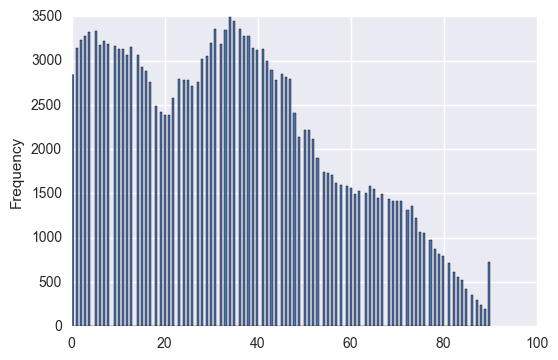

In [8]:
df_train['age'].plot(kind="hist",bins=200)

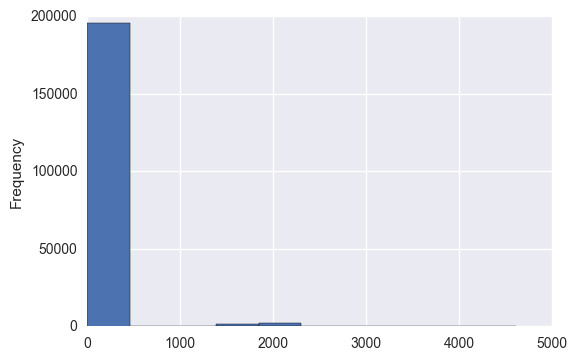

In [9]:
df_train['capital_losses'].plot(kind="hist",bins=10)

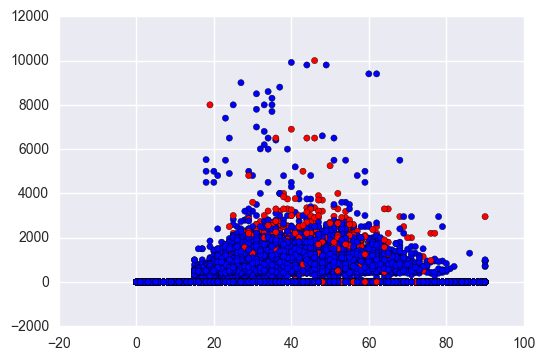

In [10]:
colors={0:'b',1:'r'}
plt.scatter(df_train["age"],df_train["wage_per_hour"],c=df_train['income_level'].apply(lambda x: colors[x]))
#plt.scatter(df_train["age"],df_train["wage_per_hour"],color='red', label='1')
plt.show()

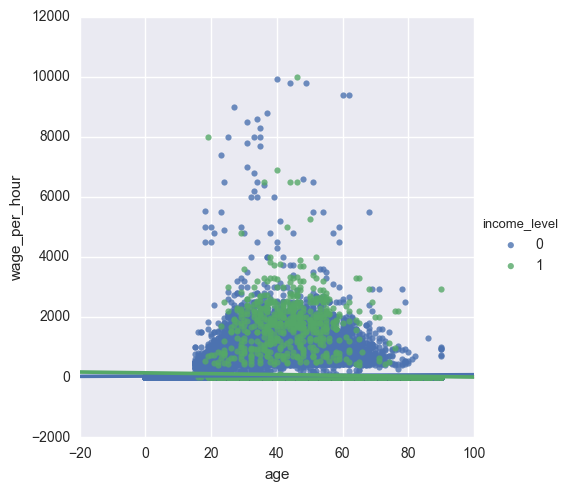

In [11]:
sns.lmplot("age","wage_per_hour",data=df_train,hue="income_level")

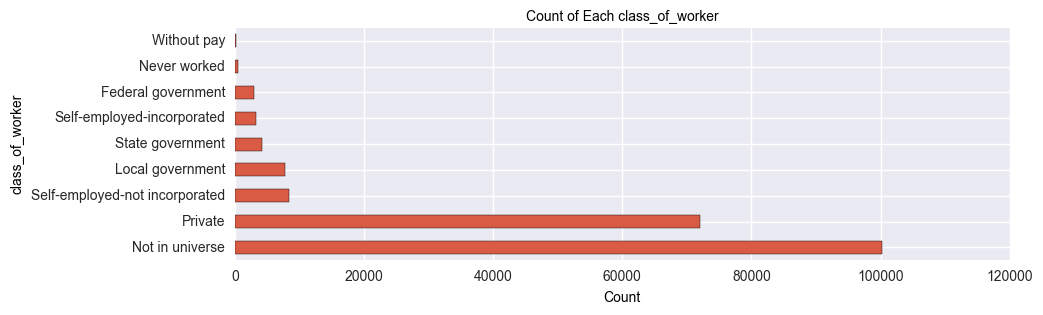

In [12]:
fig,ax=plt.subplots(1,1,figsize=(10,3))

df_train['class_of_worker'].value_counts().plot(kind='barh',ax=ax,color='#D95B43')

title='Count of Each class_of_worker'
ax.set_title(title,fontsize= 10,color='Black')

plt.xlabel('Count',fontsize= 10,color='Black')
plt.ylabel('class_of_worker',fontsize= 10,color='Black')

plt.show()
fig.tight_layout()




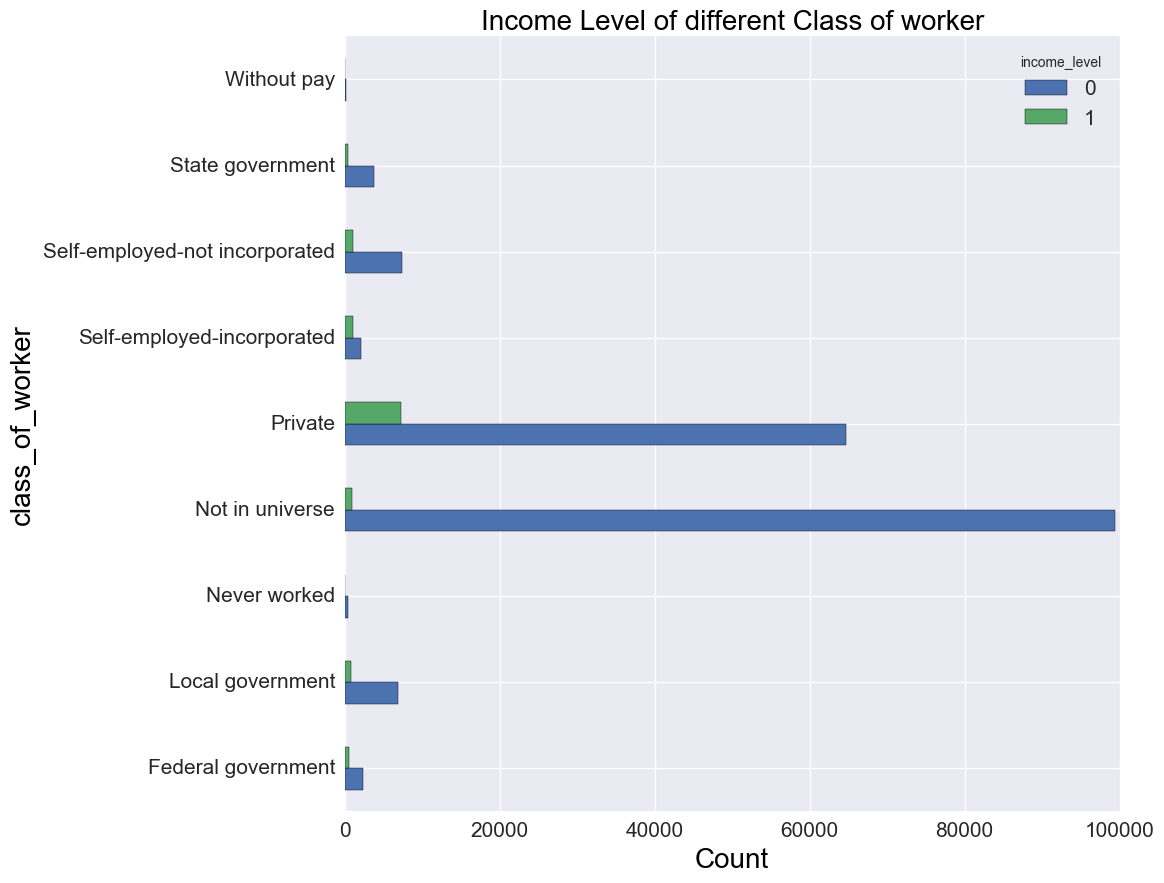

In [13]:
d=pd.crosstab(index=df_train["class_of_worker"], columns=df_train["income_level"])

fig,ax=plt.subplots(1,1,figsize=(10,10))

d.plot(kind="barh",ax=ax,stacked=False,fontsize=15).legend(fontsize='15',title='income_level')

title='Income Level of different Class of worker'
ax.set_title(title,fontsize= 20,color='Black')

plt.xlabel('Count',fontsize= 20,color='Black')
plt.ylabel('class_of_worker',fontsize= 20,color='Black')

plt.show()
fig.tight_layout()

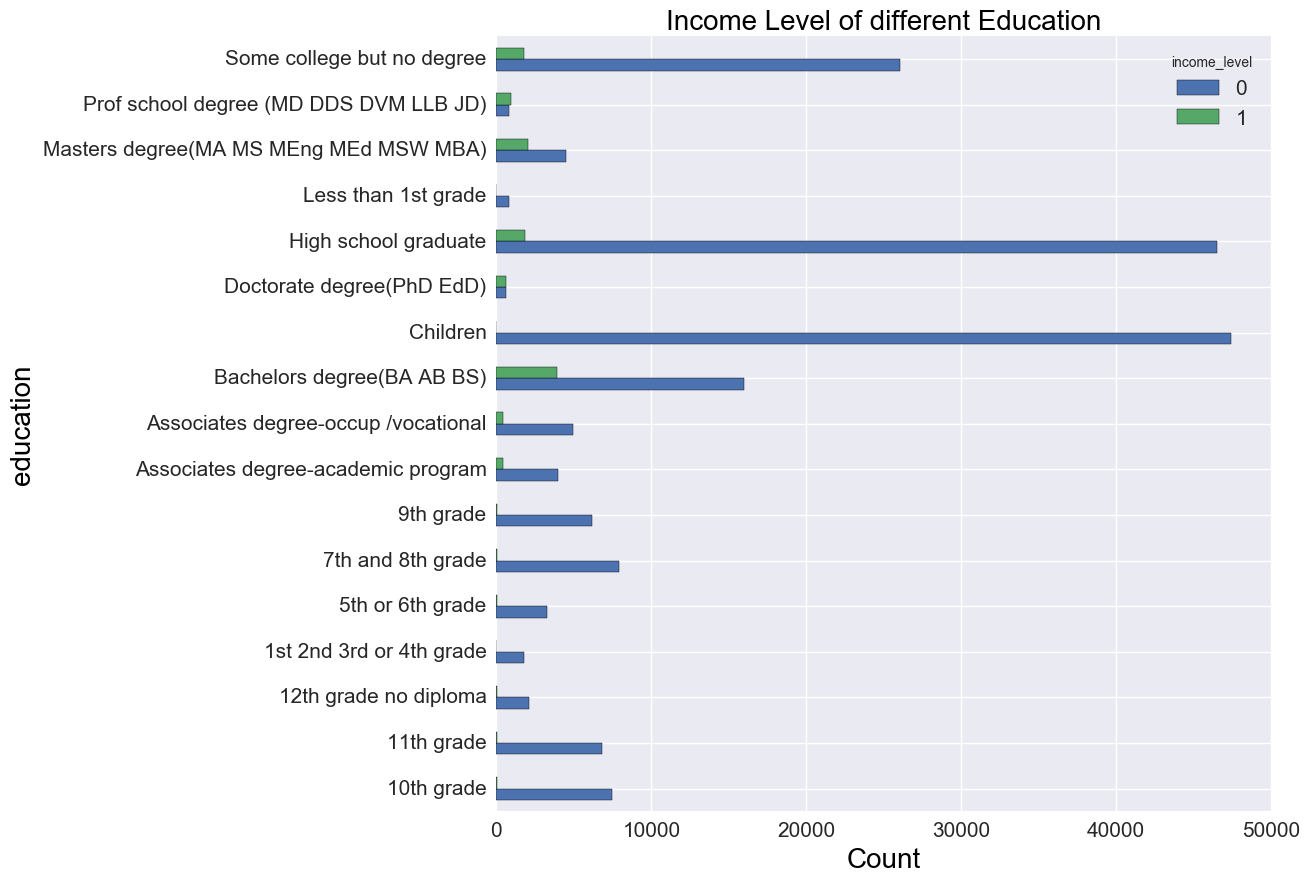

In [14]:
d=pd.crosstab(index=df_train["education"], columns=df_train["income_level"])

fig,ax=plt.subplots(1,1,figsize=(10,10))

d.plot(kind="barh",ax=ax,stacked=False,fontsize=15).legend(fontsize='15',title='income_level')

title='Income Level of different Education'
ax.set_title(title,fontsize= 20,color='Black')

plt.xlabel('Count',fontsize= 20,color='Black')
plt.ylabel('education',fontsize= 20,color='Black')

plt.show()
fig.tight_layout()

In [15]:
correlatio_table=df_train.corr()
df_train.corr().style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

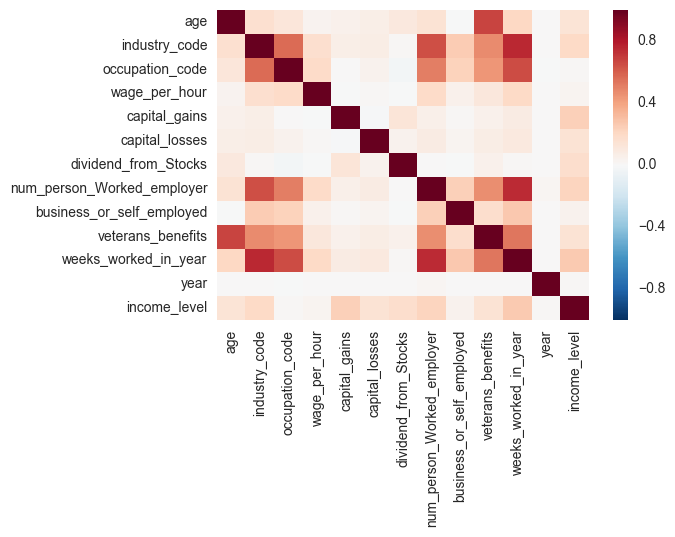

In [16]:
sns.heatmap(correlatio_table, 
            xticklabels=correlatio_table.columns.values,
            yticklabels=correlatio_table.columns.values)

# Percentage of Null in Data 

In [17]:
count=0
for each in df_train.columns:
    
    percentage=(df_train.loc[df_train[each].isnull()==True].shape[0]/df_train.shape[0])*100
    print(str(count)+str(each)+"     "+str(percentage))
    count+=1

0age     0.0
1class_of_worker     0.0
2industry_code     0.0
3occupation_code     0.0
4education     0.0
5wage_per_hour     0.0
6enrolled_in_edu_inst_lastwk     0.0
7marital_status     0.0
8major_industry_code     0.0
9major_occupation_code     0.0
10race     0.0
11hispanic_origin     0.43804473669702243
12sex     0.0
13member_of_labor_union     0.0
14reason_for_unemployment     0.0
15full_parttime_employment_stat     0.0
16capital_gains     0.0
17capital_losses     0.0
18dividend_from_Stocks     0.0
19tax_filer_status     0.0
20region_of_previous_residence     0.0
21state_of_previous_residence     0.35484630844564286
22d_household_family_stat     0.0
23d_household_summary     0.0
24migration_msa     49.967171704515266
25migration_reg     49.967171704515266
26migration_within_reg     49.967171704515266
27live_1_year_ago     0.0
28migration_sunbelt     49.967171704515266
29num_person_Worked_employer     0.0
30family_members_under_18     0.0
31country_father     3.3645243906717517
32coun

## Replace null by unavailable

In [18]:
df_train=df_train.ix[:,np.r_[0:24,27,29:41]]
df_train.fillna('Unavailable',inplace=True)


### Checking the null in test data

In [19]:
count=0
for each in df_test.columns:
    
    percentage=(df_test.loc[df_test[each].isnull()==True].shape[0]/df_test.shape[0])*100
    print(str(count)+str(each)+"     "+str(percentage))
    count+=1

0age     0.0
1class_of_worker     0.0
2industry_code     0.0
3occupation_code     0.0
4education     0.0
5wage_per_hour     0.0
6enrolled_in_edu_inst_lastwk     0.0
7marital_status     0.0
8major_industry_code     0.0
9major_occupation_code     0.0
10race     0.0
11hispanic_origin     0.0
12sex     0.0
13member_of_labor_union     0.0
14reason_for_unemployment     0.0
15full_parttime_employment_stat     0.0
16capital_gains     0.0
17capital_losses     0.0
18dividend_from_Stocks     0.0
19tax_filer_status     0.0
20region_of_previous_residence     0.0
21state_of_previous_residence     0.0
22d_household_family_stat     0.0
23d_household_summary     0.0
24migration_msa     0.0
25migration_reg     0.0
26migration_within_reg     0.0
27live_1_year_ago     0.0
28migration_sunbelt     0.0
29num_person_Worked_employer     0.0
30family_members_under_18     0.0
31country_father     0.0
32country_mother     0.0
33country_self     0.0
34citizenship     0.0
35business_or_self_employed     0.0
36fill_

In [20]:
df_train.shape

(199523, 37)

In [21]:
num_df=df_train[['age','industry_code', 'occupation_code','wage_per_hour','capital_gains','capital_losses','num_person_Worked_employer','business_or_self_employed','veterans_benefits','weeks_worked_in_year','year']]

In [22]:
cat_df=df_train[['class_of_worker','education','enrolled_in_edu_inst_lastwk','marital_status','major_industry_code','major_occupation_code','race','hispanic_origin','sex','member_of_labor_union','reason_for_unemployment','full_parttime_employment_stat','tax_filer_status','region_of_previous_residence','state_of_previous_residence','d_household_family_stat','d_household_summary','live_1_year_ago','num_person_Worked_employer','family_members_under_18','country_father','country_mother','country_self','citizenship','fill_questionnaire_veteran_admin']]

In [23]:
df_train['income_level'].value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

# Combining the factor levels

In [24]:
def CombineLevels(x):
    if x in list(LabelstoCombine):
        return "Other"
    else:
        return x

In [25]:
for each in cat_df:
    name=each
    percentageDistribution=df_train.groupby(name).size()*100/df_train.shape[0]
    #print(percentageDistribution)
    LabelstoCombine=percentageDistribution[percentageDistribution<5].index
    df_train[name]=df_train[name].apply(CombineLevels)
    #print(name)
    #print("*****************************************************")

In [26]:
for each in cat_df:
    name=each
    percentageDistribution=df_test.groupby(name).size()*100/df_test.shape[0]
    #print(percentageDistribution)
    LabelstoCombine=percentageDistribution[percentageDistribution<5].index
    df_test[name]=df_test[name].apply(CombineLevels)
    #print(name)
    #print("*****************************************************")

# Check if there are same number of levels in train and test

In [27]:
flag=0
for each in cat_df:
    name=each
    #print("*****************************")
    #print(name)
    #print("Train Data Level Count {}".format(df_train[name].value_counts().count()))
    #print("Test data level Count  {}".format(df_test[name].value_counts().count()))
    
    #print("\n")
    if(df_train[name].value_counts().count()!=df_test[name].value_counts().count()):
        print("Different levels Count")
        flag=1
        break
    else:
        pass
if(flag==0):
    print("Same level Counts")

Same level Counts


# Converting Categorial Variables into labelled numbers


In [28]:
import sys
print(sys.prefix)

C:\Users\C5258370\AppData\Local\Continuum\Anaconda3


In [29]:
import sklearn
from sklearn import preprocessing

lb_make = preprocessing.LabelEncoder()

In [30]:
for each in cat_df:
    name=each
    df_train[name] = lb_make.fit_transform(list(df_train[each].values))
    
df_train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,0,0,0,2,0,0,4,0,2,...,2,1,1,1,0,0,2,0,95,0
1,58,1,4,34,4,0,0,0,1,5,...,2,1,1,1,0,0,2,52,94,0
2,18,0,0,0,3,0,1,2,0,2,...,1,0,0,0,0,0,2,0,95,0
3,9,0,0,0,1,0,0,2,0,2,...,2,1,1,1,0,0,0,0,94,0
4,10,0,0,0,1,0,0,2,0,2,...,2,1,1,1,0,0,0,0,94,0


# Test Data

In [31]:
for each in cat_df:
    name=each
    df_test[name] = lb_make.fit_transform(list(df_test[each].values))
    
df_test.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,38,1,6,36,4,0,0,1,2,7,...,0,1,1,0,0,0,2,12,95,0
1,44,2,37,12,4,0,0,1,2,5,...,1,0,0,1,0,0,2,26,95,0
2,2,0,0,0,1,0,0,2,0,2,...,1,0,0,1,0,0,0,0,95,0
3,35,1,29,3,2,0,0,0,2,1,...,1,0,0,1,2,0,2,52,94,0
4,49,1,4,34,2,0,0,0,2,4,...,1,0,0,1,0,0,2,50,95,0


In [32]:
df_train.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'live_1_year_ago', 'num_person_Worked_employer',
       'family_members_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'business_or_self_employed',
       'fill_questionnaire_veteran_admin', 'veterans_benefits',
       'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

# Binning of Numerical Data

In [33]:
m=df_train

In [34]:
bins=[0,15,20,45]
x=pd.qcut(m['age'],4)

In [35]:
x.head()

0    (50, 90]
1    (50, 90]
2    (15, 33]
3     [0, 15]
4     [0, 15]
Name: age, dtype: category
Categories (4, object): [[0, 15] < (15, 33] < (33, 50] < (50, 90]]

In [36]:
m['age'].values

array([73, 58, 18, ..., 47, 16, 32], dtype=int64)

In [37]:
m['income_level'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Trying to bin it using decision tree classifier

In [38]:
#from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
#iris = load_iris()
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [39]:
X=m['age'].values.reshape(-1,1)
Y=list(m['income_level'].values)
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
from sklearn import tree

with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)

# MACHINE LEARNING

In [41]:
df_train.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'live_1_year_ago', 'num_person_Worked_employer',
       'family_members_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'business_or_self_employed',
       'fill_questionnaire_veteran_admin', 'veterans_benefits',
       'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [42]:
df_test.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [43]:
df_test.drop(['migration_msa','migration_reg','migration_within_reg','migration_sunbelt'],axis=1,inplace=True)

# Variance for each variable

##  For Categorial Features

In [44]:
n=df_train[list(cat_df.columns)]

In [45]:
variances=pd.Series(df_train[list(cat_df.columns)].var(axis=0))


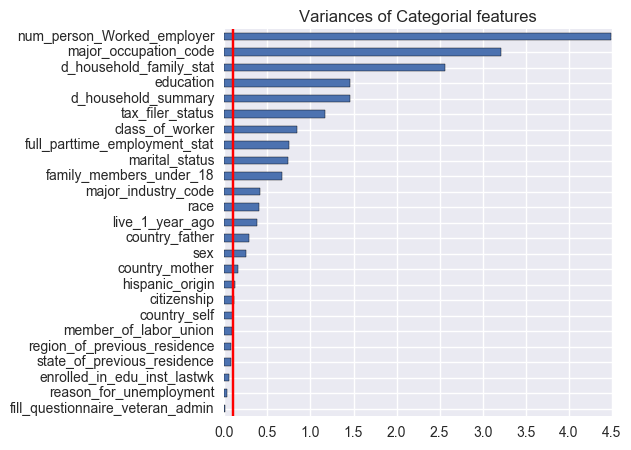

In [46]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
variances.loc[list(cat_df.columns)].sort_values().plot(kind='barh',ax=ax)
ax.vlines(0.1,ymin=-1,ymax=25,colors='red')
ax.set_title('Variances of Categorial features')

In [47]:
lowVarianceVariable=['country_self','member_of_labor_union','region_of_previous_residence','state_of_previous_residence','enrolled_in_edu_inst_lastwk','reason_for_unemployment','fill_questionnaire_veteran_admin']

for each in lowVarianceVariable:
    df_train.drop(each,axis=1,inplace=True)
    
for each in lowVarianceVariable:
    df_test.drop(each,axis=1,inplace=True)

# Feature Selection :Selection of the k best features for CLASSIFICATION

In [48]:
df_train_target=df_train['income_level']
df_test_target=df_test['income_level']

In [49]:
df_train.drop(['income_level'],axis=1,inplace=True)
df_test.drop(['income_level'],axis=1,inplace=True)

## For Categorial value

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
dummy_selector=SelectKBest(chi2,k="all")
dummy_selector.fit(df_train,df_train_target)

SelectKBest(k='all', score_func=<function chi2 at 0x000002A2474C8488>)

In [52]:
print (dummy_selector.get_support(indices=True))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


In [53]:
vector_names = list(df_train.columns[dummy_selector.get_support(indices=True)])
featureImportance_df=pd.DataFrame()
for (name,score) in zip(vector_names,dummy_selector.scores_):
    
    data=pd.DataFrame({"Feature":[name],"Score":score})
    
    featureImportance_df=featureImportance_df.append(data)
    
featureImportance_df.sort_values('Score',ascending=False,inplace=True)
featureImportance_df.set_index('Feature',inplace=True)

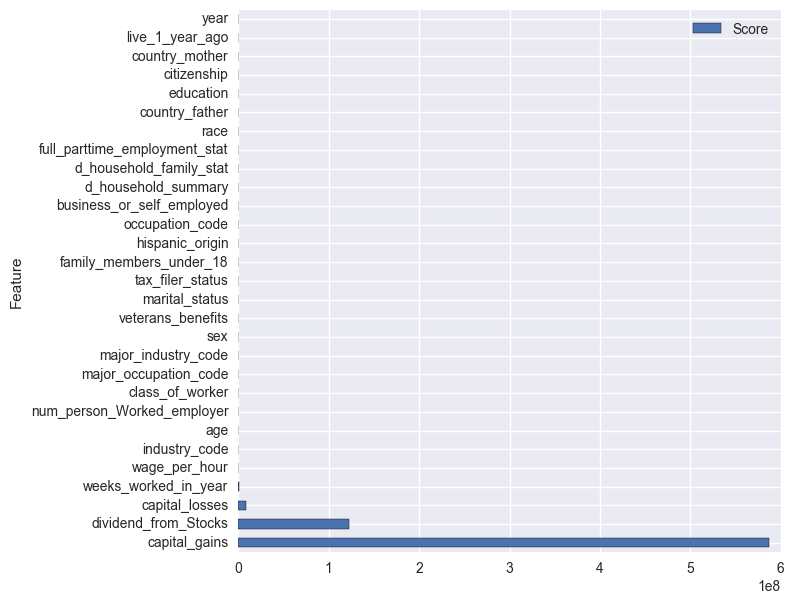

In [54]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
featureImportance_df.sort_values('Score',ascending=False).plot(kind='barh',ax=ax)
plt.show()

In [55]:
dummy_selector.scores_

array([  5.30357651e+04,   6.69269542e+03,   1.63285428e+05,
         6.63385633e+02,   3.85786711e+01,   1.63659072e+05,
         1.73425335e+03,   3.81288343e+03,   4.57386638e+03,
         1.28942771e+02,   7.51100306e+02,   2.58305152e+03,
         1.29277727e+02,   5.86898878e+08,   8.59061060e+06,
         1.22871166e+08,   1.70680875e+03,   1.59991108e+02,
         4.41961447e+02,   1.36338360e+01,   2.40185380e+04,
         1.61099834e+03,   4.18616559e+01,   1.97019014e+01,
         2.32509663e+01,   5.71119727e+02,   1.89659191e+03,
         3.53029907e+05,   1.15521017e-01])

In [56]:
dummy_selector.pvalues_

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         2.74185723e-146,   5.25905056e-010,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         6.98022596e-030,   2.31289424e-165,   0.00000000e+000,
         5.89630187e-030,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   1.13655655e-036,
         4.05099626e-098,   2.22145537e-004,   0.00000000e+000,
         0.00000000e+000,   9.79650385e-011,   9.05112621e-006,
         1.42178995e-006,   3.20439695e-126,   0.00000000e+000,
         0.00000000e+000,   7.33944015e-001])

## Feature Importance using Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(df_train,df_train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

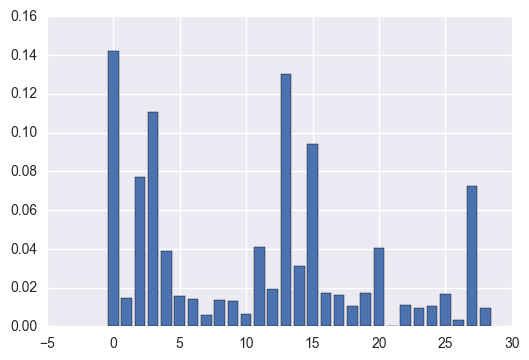

In [58]:
importance=clf.feature_importances_
importance = pd.DataFrame(importance, index=df_train.columns, 
                          columns=["Importance"])

#importance["Std"] = np.std([tree.feature_importances_
#                            for tree in clf.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
#yerr = importance.ix[:, 1]

plt.bar(x, y, align="center")

plt.show()

In [59]:
importance.sort_values('Importance',ascending=False)

,Importance
age,0.141924
capital_gains,0.130342
occupation_code,0.110592
dividend_from_Stocks,0.094145
industry_code,0.077050
weeks_worked_in_year,0.072515
sex,0.040665
num_person_Worked_employer,0.040490
education,0.038620
capital_losses,0.030982


## Feature Importance using Random Forest

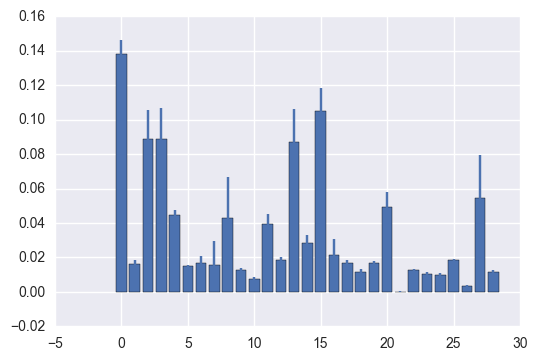

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(df_train,df_train_target)

importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df_train.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in clf.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

In [61]:
importance.sort_values('Importance',ascending=False)

,Importance,Std
age,0.138140,0.007998
dividend_from_Stocks,0.104769,0.013480
occupation_code,0.088752,0.017869
industry_code,0.088522,0.016878
capital_gains,0.087025,0.019136
weeks_worked_in_year,0.054417,0.024917
num_person_Worked_employer,0.049105,0.008809
education,0.044620,0.003038
major_occupation_code,0.043117,0.023492
sex,0.039249,0.006155


## For Numerical Features

In [62]:
from sklearn.feature_selection import f_classif

In [63]:
num_selector=SelectKBest(f_classif,k='all')
num_selector.fit(df_train[list(num_df.columns)],df_train_target)

SelectKBest(k='all', score_func=<function f_classif at 0x000002A2474C8048>)

In [64]:
num_selector.pvalues_

array([  0.00000000e+00,   0.00000000e+00,   2.07273713e-09,
         6.09367235e-28,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.14083116e-73,   0.00000000e+00,
         0.00000000e+00,   3.88477360e-11])

In [65]:
pd.Series(list(num_df.columns)).loc[num_selector.pvalues_>0.1]

Series([], dtype: object)

# Sampling using IMBLEARN

### Converting data as input feature format

In [66]:
X=df_train.as_matrix(columns=None).astype('int')
Y=np.array(df_train_target).astype('int')


X_test=df_test.as_matrix(columns=None).astype('int')
Y_test=np.array(df_test_target).astype('int')

###  Splitting the data into train and validation set

In [67]:
from sklearn.model_selection import train_test_split
from collections import Counter


x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size = .1,random_state=12)

print('Original dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({0: 168387, 1: 11183})


### SMOTE(Synthetic Minority Oversampling Technique )

In [68]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(ratio='auto',random_state=12,k_neighbors=3)
x_train_res, y_train_res = sm.fit_sample(x_train,y_train)

print('Sampled dataset shape {}'.format(Counter(y_train_res)))

Sampled dataset shape Counter({0: 168387, 1: 168387})


# Training the Model

### Trying Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=12)
clf.fit(x_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

### Metric Evaluation

In [70]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_val,clf.predict(x_val)).ravel()
print("Confusion Matrix\n {}".format(confusion_matrix(y_val,clf.predict(x_val))))
print("Precision is {}".format(tp/(tp+fp)))
print("Recall is {}".format(tp/(tp+fn)))
print("Accuracy is {}".format((tp+tn)*100/(tp+fp+fn+tn)))

Confusion Matrix
 [[18482   272]
 [  743   456]]
Precision is 0.6263736263736264
Recall is 0.3803169307756464
Accuracy is 94.91304565729465


In [71]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_val,clf.predict(x_val))

0.44822178218771325

In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,clf.predict(X_test))

0.97923056875363368

### Naive Bayes using 10 fold cross validation

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
gnb = GaussianNB()

gnb.fit(x_train_res,y_train_res)

GaussianNB(priors=None)

In [74]:
Y_pred=gnb.predict(x_val)

### Metric Evaluation

In [75]:
from sklearn.metrics import confusion_matrix

tn, fp, fn ,tp =confusion_matrix(y_val,Y_pred).ravel()
print("Confusion Matrix\n {}".format(confusion_matrix(y_val,Y_pred)))
print("Precision is {}".format(tp/(tp+fp)))
print("Recall is {}".format(tp/(tp+fn)))
print("Accuracy is {}".format((tp+tn)*100/(tp+fp+fn+tn)))

Confusion Matrix
 [[14444  4310]
 [  174  1025]]
Precision is 0.19212746016869728
Recall is 0.8548790658882403
Accuracy is 77.52718889390067


### SVM for with 

# Tuning with XGBoost

In [76]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

C:\Users\C5258370\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\C5258370\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [77]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 
 scale_pos_weight=1,
 seed=27)

#modelfit(xgb1, df_train,df_train_target, predictors)

### Get number of Estimators using learning rate as 0.1

In [ ]:
xgb_param = xgb1.get_xgb_params()
cv_folds=10
early_stopping_rounds=50

xgtrain = xgb.DMatrix(x_train, label=y_train)

cvresult=xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)

In [ ]:
#Number of estimators

cvresult.shape[0]

In [ ]:
xgb1.set_params(n_estimators=cvresult.shape[0])

In [ ]:
#Fit the algorithm on the data
xgb1.fit(x_train_res,y_train_res,eval_metric='auc')

#Predict training set:
dtrain_predictions = xgb1.predict(x_train_res)
dtrain_predprob = xgb1.predict_proba(x_train_res)[:,1]

#Predict  Validation Set:
dtest_predictions = xgb1.predict(x_val)
dtest_predprob = xgb1.predict_proba(x_val)[:,1]

#Print model report for Train Data:
print( "\nModel Report")
print( "Accuracy : %.4g" % metrics.accuracy_score(y_train_res, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_res, dtrain_predprob))


#Print model report for validation Data:
print( "\nModel Report")
print( "Accuracy : %.4g" % metrics.accuracy_score(y_val, dtest_predictions))
print ("AUC Score (Test): %f" % metrics.roc_auc_score(y_val, dtest_predprob))


### In Xgboost we can also do the training using a dataframe directly

### Generating feature importance based on f score

In [ ]:
from xgboost import plot_importance

plot_importance(xgb1)

### Grid Search CV

In [ ]:
param_test1 = {
 'max_depth':list(range(10,15,2)),
 'min_child_weight':list(range(5,10,2))
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=301, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(df_train[predictors],df_train_target)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn ,tp =confusion_matrix(y_val,dtest_predictions).ravel()
print("Confusion Matrix\n {}".format(confusion_matrix(y_val,dtest_predictions)))
print("Precision is {}".format((tp*100)/(tp+fp)))
print("Recall is {}".format((tp*100)/(tp+fn)))
print("Accuracy is {}".format((tp+tn)*100/(tp+fp+fn+tn)))